# Job_Application_Prediction

## 1. Importing the Data  

In [1]:
import numpy as np # importing numpy array
import pandas as pd # importing panda library
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab 
import datetime
datetime.datetime.strptime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/Parth/Downloads/ozan_p_pApply_intern_challenge_03_20_min.csv')
data.head(3)

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,u_id,mgoc_id
0,0.0,0.198377,0.000000,0.022545,0.014706,1.0,16.0,0,2018-01-24,5f42afe6-e7d0-4822-b95e-57ae0682fa24,10148
1,0.0,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
2,0.0,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016


### What are the columns?
1) title proximity tf idf: Measures the closeness of query and job title.

2) description proximity tf idf: Measures the closeness of query and job description.

3) main query tf idf: A score related to user query closeness to job title and job description.

4) query jl score: Measures the popularity of query and job listing pair.

5) query title score: Measures the popularity of query and job title pair.

6) city match: Indicates if the job listing matches to user (or, user-specified) location.

7) job age days: Indicates the age of job listing posted.

8) apply: Indicates if the user has applied for this job listing.

9) search date pacif ic: Date of the activity.

10) u id: ID of user (for privacy reasons ID is anonymized).

11) mgoc id: Class ID of the job title clicked.

In [3]:
data.shape  

(1200890, 11)

The dataset has 1200890 rows and 11 columns

In [4]:
data.dtypes

title_proximity_tfidf          float64
description_proximity_tfidf    float64
main_query_tfidf               float64
query_jl_score                 float64
query_title_score              float64
city_match                     float64
job_age_days                   float64
apply                            int64
search_date_pacific             object
u_id                            object
mgoc_id                          int64
dtype: object

To check if our output column has any junk/Nan values

In [5]:
data['apply'].unique()

array([0, 1], dtype=int64)

Our output value only has 0 and 1 hence no junk values

In [6]:
# checking for nan values in our data
data.isnull().values.any()

False

<b>Since we don't have any null/Nan values in our data, data cleaning is not required</b>

## Explonatory Data Analysis
 This will help in identifying any issues with our data in terms of numbers, relationships

In [7]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,mgoc_id
count,1200890.00,1200890.00,1200890.00,1200890.00,1200890.00,1200890.00,1200890.00,1200890.00,1200890.00
mean,4.65,0.08,1.77,0.02,0.04,0.23,10.10,0.09,9926.55
std,8.99,0.26,2.24,0.01,0.05,0.78,17.39,0.29,1228.17
min,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,-1.00
25%,0.00,0.00,0.00,0.01,0.01,0.00,2.00,0.00,10039.00
50%,0.00,0.00,0.25,0.02,0.02,0.00,6.00,0.00,10082.00
75%,3.38,0.04,3.42,0.02,0.04,1.00,14.00,0.00,10120.00
max,93.52,7.30,17.74,0.26,1.29,1.00,1340.00,1.00,10157.00


As we can see, the column 'job_age_days' has a max value of 1340 which is an issues or a wrong number, since this means that respective job is open since 1340 days, which is almost 3 and half years.
That's look incorrect.
Also, for title proximity, the max value is 93.52 whereas 75% quartile is 3.38

In [8]:
# to identify how many jobs are posted more than 800 days ago
data[data['job_age_days']>800].shape[0]

46

Basd on above results, it appears that many job requisitions which are open since a long time are not yet closed and thus are accepting applications

In [9]:
# Converting the date column to date datatype for analysis and creating training and test data

In [10]:
data['search_date_pacific'] = pd.to_datetime(data['search_date_pacific']).dt.date

### Identifying co-relation between all the variables

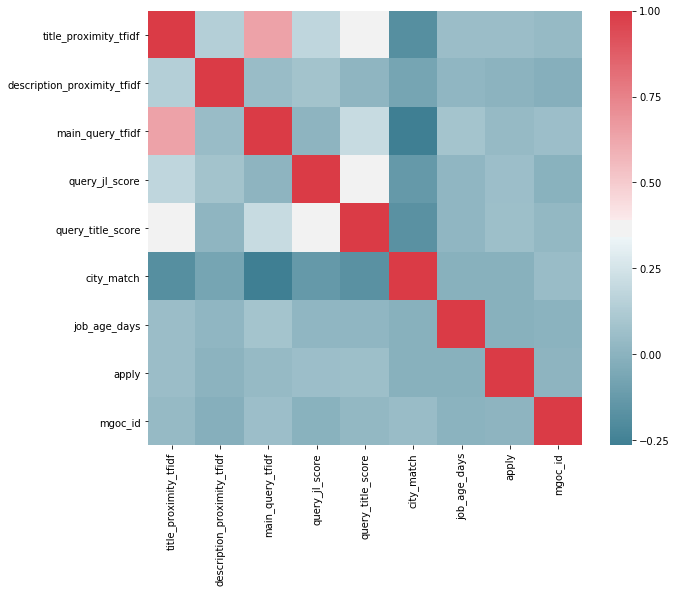

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

As per above graph we can analyze the following:
1. title_proximity(queryand job title) and main_query(job title and description closeness) have a strong positive co-relation
2. query title score (popularity of query and job title) and query_jl (popularity of query and job listing) have some correlation
3. query title score (popularity of query and job title) and title_proximity(queryand job title) also have some +ve correlation
4. several variables don't have any co-relation with each other

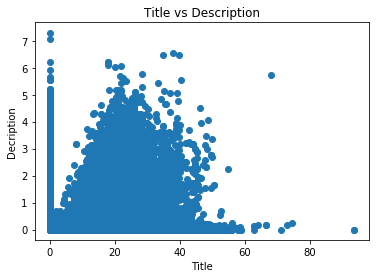

In [12]:
#fig, ax = plt.subplots(figsize=(20,8))
plt.scatter(data['title_proximity_tfidf'],data['description_proximity_tfidf'])
plt.title('Title vs Description')
plt.xlabel('Title')
plt.ylabel('Decription')
plt.show()

#### Title and description score seems to have some relation, although it's not strong but they have positive relation

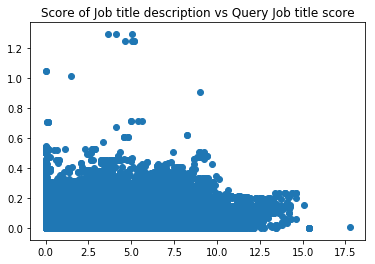

In [13]:
#fig, ax = plt.subplots(figsize=(20,8))
plt.scatter(data['main_query_tfidf'],data['query_title_score'])
plt.title('Score of Job title description vs Query Job title score')
plt.show()

There appears to be a positive relation between these scores and the points are wide spread with few outliers

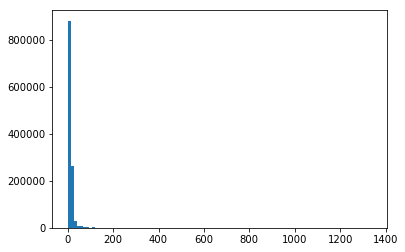

In [14]:
# Distriution of job_age_days variable
plt.hist(data['job_age_days'],bins=100)
plt.show()

As we can see, job_age_days variable is hightly skewed to the right, because of points having huge values (greater than 1000)

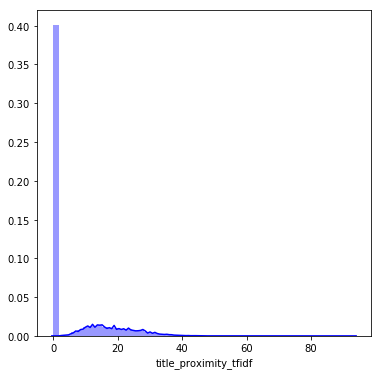

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot(data['title_proximity_tfidf'],color='blue')
#plt.show()

The density plot of this variable is not proper because of high outliers or scores present and even this variable is skewed

### Normal QQ plot for variables to identify potential outliers

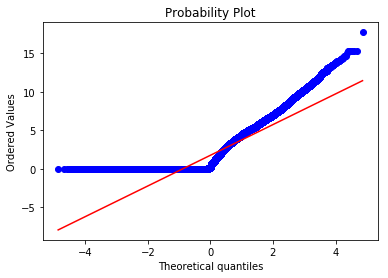

In [16]:
stats.probplot(data['main_query_tfidf'], dist="norm", plot=pylab)
pylab.show()

Score of user query closeness to job title and job description variable doesn't have much outliers since the data is continuously spread across points also it's constant and then increases linearly

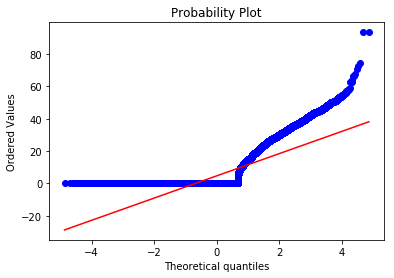

In [17]:
stats.probplot(data['title_proximity_tfidf'], dist="norm", plot=pylab)
pylab.show()

Score of user query closeness to job title  variable is almost same as the above with similar structure

<b> Violin plot of job age days title score variable to capture outliers and spread of the variable </b>

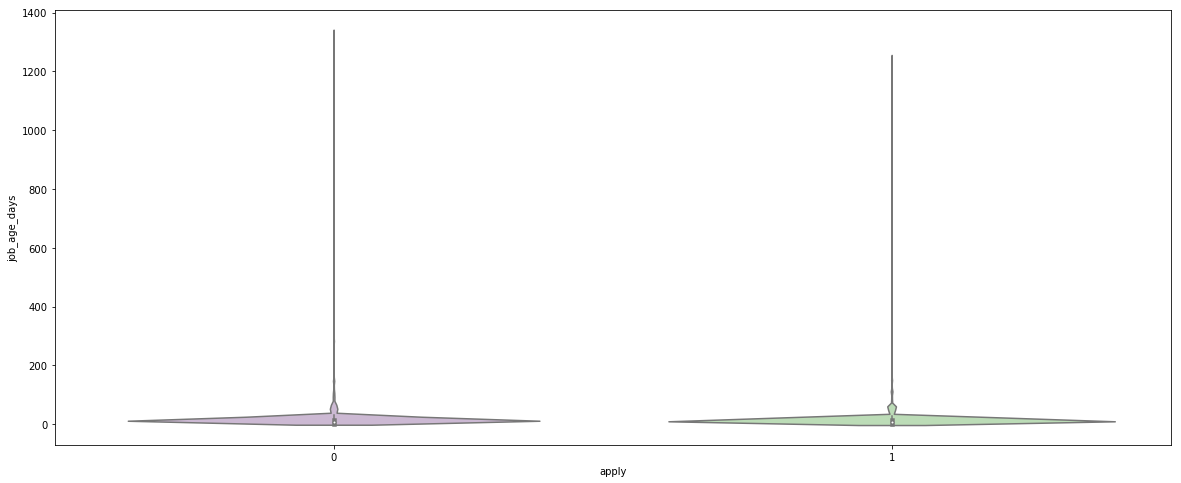

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(x="apply", y="job_age_days", data=data, palette="PRGn")

because this variable has outliers and highly skewed, the plots appear vague and less informative

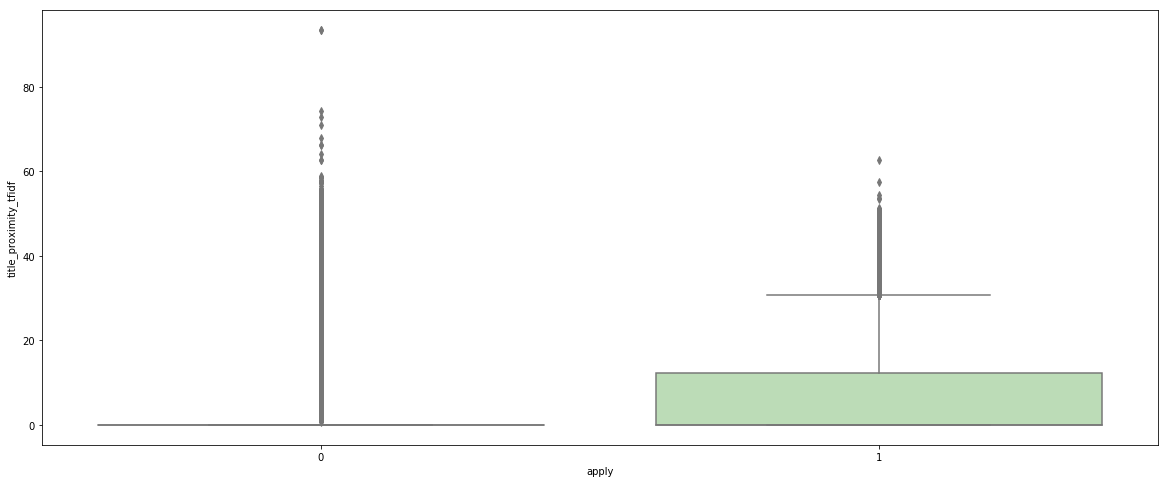

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="apply", y="title_proximity_tfidf", data=data, palette="PRGn")

As we can see, majority of the points are in the range 0-5, and then it starts rising and reaches above 90

# Questions to our data (Data Analysis)

### 1. How many users have applied for jobs vs posted

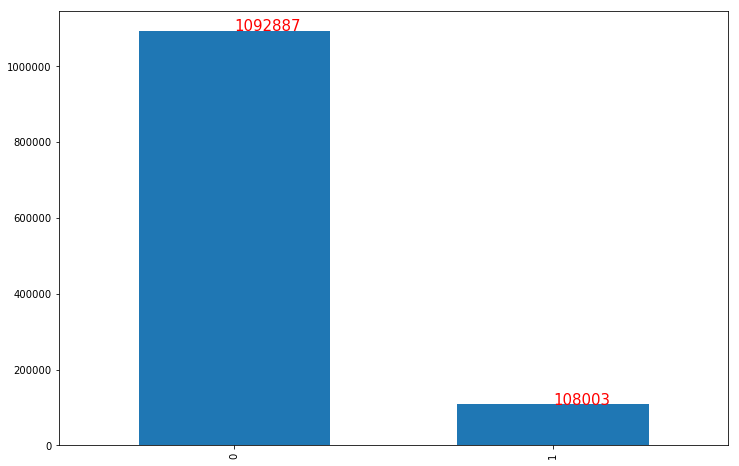

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
s = data['apply'].value_counts()
ax=s.plot.bar(width=.6) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v['apply'] + 1 , v['apply'], color='red',size=15)

In [21]:
# Apply percentage against jobs
((data[data['apply']==1].shape[0]/data.shape[0])*100)

8.993579761676756

<b> Only 9% of the candidates have actually applied for job in our data </b>

### 2. What particular day of the week recorded maximum applications

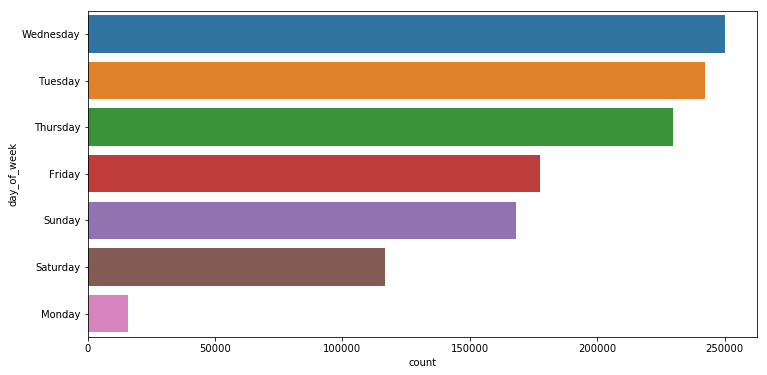

In [22]:
data['search_date_pacific'] = pd.to_datetime(data['search_date_pacific'])
data['day_of_week'] = data['search_date_pacific'].dt.weekday_name
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y='day_of_week',data=data,order = data['day_of_week'].value_counts().index)

Interesting observation is against weekends, it's the mid of the week which recorded maximum applications followed by Tuesday.
Monday recorded the least number of applications

### 3. Does the age of job impacts the number of applications?
For jobs with age above 180 (6 months), what is the %age of applications

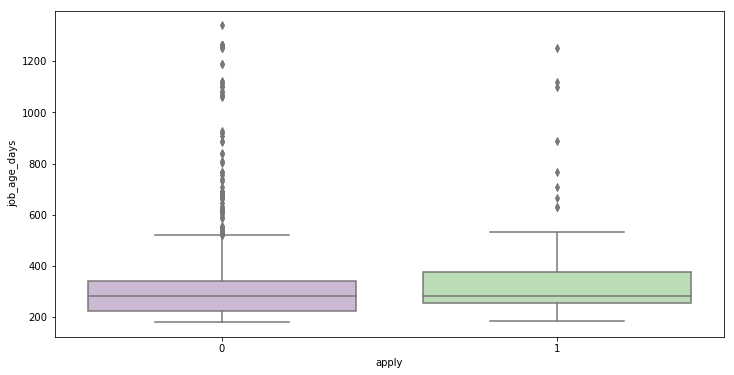

In [23]:
data2=data[data['job_age_days']>180]
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="apply", y="job_age_days", data=data2, palette="PRGn")

The mean and median of the variable with respect to the output variable are almost the same, except the fact that the number of outliers in case of job which was not applied is high

In [24]:
(data2[data2['apply']==1].shape[0]/data2.shape[0])*100

7.317073170731707

<b> 7% of candidates have applied for jobs which are open since 6 months. The total application ratio is 9% </b>

### 4. Does location affects job applications?

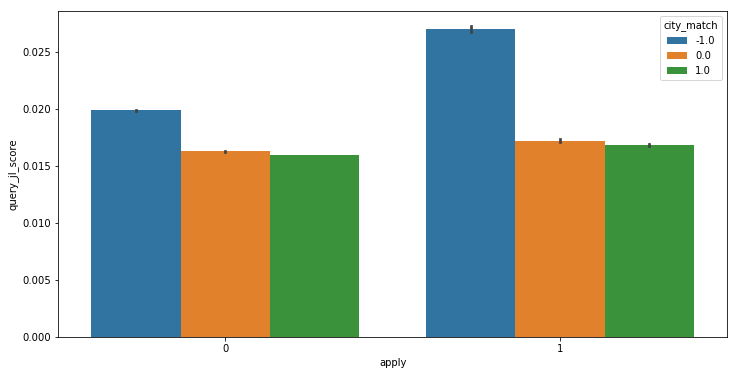

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="apply", y="query_jl_score", hue="city_match", data=data);

As we can see from above result, the score pf popularity of query and job listing is same for candidadates applying and not applying. Location doesn't affect the numbers or the score against popular beliefs


## Creation of training and test data

In [26]:
data["search_date_pacific"].unique() # to check unique values in the column

array(['2018-01-24T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-21T00:00:00.000000000',
       '2018-01-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [27]:
data_train=data[pd.to_datetime(data["search_date_pacific"]).isin(pd.date_range("2018-01-21", "2018-01-26"))]

In [28]:
data_test=data[pd.to_datetime(data["search_date_pacific"])==pd.datetime(2018,1,27)]

In [29]:
data_train.shape

(1084364, 12)

In [30]:
data_train=data_train.set_index('search_date_pacific')
data_test=data_test.set_index('search_date_pacific')

In [31]:
data_test.shape

(116526, 11)

In [32]:
X_train=data_train.iloc[:,0:7]
Y_train=data_train['apply']
X_test=data_test.iloc[:,0:7]
Y_test=data_test['apply']

### Recursive Feature Elimination (RFE)

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


As per above results, all the features present in the model are significant

### Creating Logictic Regression using statsmodel library

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.365974
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  apply   No. Observations:              1084364
Model:                          Logit   Df Residuals:                  1084357
Method:                           MLE   Df Model:                            6
Date:                Mon, 26 Mar 2018   Pseudo R-squ.:                 -0.2112
Time:                        23:45:25   Log-Likelihood:            -3.9685e+05
converged:                       True   LL-Null:                   -3.2765e+05
                                        LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
title_proximity_tfidf           0.0460      0.000     95.009      0.000   

### Based on above summary we can infer that:
1. All the variables present in the model are significant with p-values less than 0.05
2. We can thus reject the NULL HYPOTHESIS and accept alternate hypothesis

### Logistic Regression using Sckit-learn

In [35]:
from sklearn import metrics # importing this to find the accuracy
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from regressors import stats
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
y_pred = logreg.predict(X_test)


In [38]:
np.unique(y_pred, axis=0)

array([0], dtype=int64)

In [39]:
from sklearn import metrics
#Checking the accuracy of our model by comparing it with the actual value
print (metrics.accuracy_score(Y_test,y_pred))

0.909153322005


<b> the accuracy of our model comes out to be 90% </b>

In [40]:
from sklearn.metrics import roc_auc_score
print (roc_auc_score(Y_test,y_pred))

0.5


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[105940      0]
 [ 10586      0]]


### Our model has predicted only Zero's and no ones and even after that we have an accuracy of 90 %

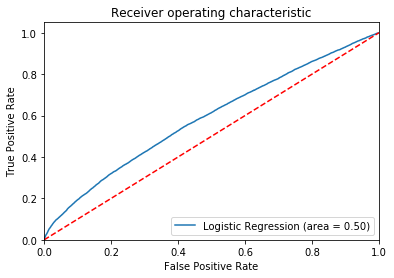

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
Our model still does a good job

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95    105940
          1       0.00      0.00      0.00     10586

avg / total       0.83      0.91      0.87    116526



<b> Even above, we can easily see that , our model has not predicted 1 at all </b>

## Note:

Something is wrong , our model can predict negative applications or when a candidate will not apply for the job.
We are interested in knowing, whether due to these scores, what happens and how it impacts the candidate while applying.

This is a case of <b> imbalanced class</b>, which usually happens if the dataset (predicted value) has huge difference in proportion.

<b> In our case, only 9% of the data contain 1's and the rest contain 0. Theirfore our model has predicted only 0. </b>

### Using Random Forest Classifier to test the model

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train,Y_train)
a=clf.predict(X_test)
print(classification_report(Y_test, a))
print(pd.crosstab(Y_test, a, rownames=['Actual'], colnames=['Predicted']))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95    105940
          1       0.18      0.00      0.01     10586

avg / total       0.84      0.91      0.87    116526

Predicted       0    1
Actual                
0          105733  207
1           10540   46


#### Random Forest predicts upto 18% of the data having 1's correctly, which is fairly low  ( in Logistic Regression, we didn't had any predictions) and the accuracy of this model is 90.8 %

.

## How to resolve class imbalance issue?

> One approach will be to change the parameters of our model and try to get the results</b>

> Other approach is using Python library <b>SMOTE</b>, we can oversample the minority to an extent that there is less bias againt the model and the model does not only predicts 0's but also 1's.

### Results after changing the parameters in Logistic Regression model

The balance calculation regarding majority and minority samples are done internally by the model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from regressors import stats
logreg = LogisticRegression(class_weight='balanced',penalty='l2')
logreg.fit(X_train, Y_train)
new_y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, new_y_pred))
pd.crosstab(Y_test, new_y_pred, rownames=['Actual'], colnames=['Predicted'])

             precision    recall  f1-score   support

          0       0.93      0.66      0.77    105940
          1       0.12      0.47      0.19     10586

avg / total       0.85      0.64      0.72    116526



Predicted,0,1
Actual,,
0,69665,36275
1,5642,4944


<b> The predicted accuracy of this model is 64% with Precision,Recall and f-score 0.85,0.64 and 0.72 respectively </b>

### Using SMOTE (class imbalance library)

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state=12, ratio = 'minority') # ration percentage can also be set but it's old method
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [48]:
ab=pd.DataFrame(y_train_res,columns=['apply'])
ab['apply'].value_counts()

1    986947
0    986947
Name: apply, dtype: int64

In [49]:
from sklearn import metrics # importing this to find the accuracy
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train_res, y_train_res)
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[68730 37210]
 [ 5590  4996]]


Based on above confusion matrix, our model predicted , <b>4996</b> data correctly as those jobs against <b>5590</b> which are actual values which will be applied based on their scores

## When we compare LR after SMOTE with LR before smote, it is observed that there is not much difference between the accuracy. 
## Only the number of 1's predicted increase in SMOTE

In [50]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.65      0.76    105940
          1       0.12      0.47      0.19     10586

avg / total       0.85      0.63      0.71    116526



<b>Interpretation:</b> 
Of the entire test set, there's likelihood probability that <b>85%</b> of the jobs candidates liked. Of the entire test set, we can say that there is a likelihood probability of <b>63%</b> that the candidate’s will apply to those jobs.

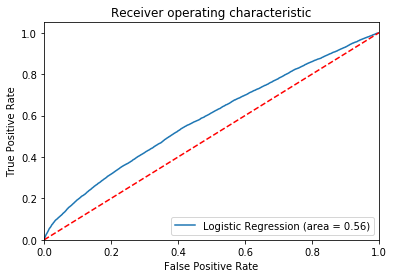

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The area under ROC curve specifies the probability that, when we draw one positive and one negative example at random, the decision function assigns a higher value to the positive than to the negative example.

Our model performs better than random guessing, with 56% of the area is covered by our classfier algorithm

In [52]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_res,x_train_res)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.687864
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1973894
Model:                          Logit   Df Residuals:                  1973887
Method:                           MLE   Df Model:                            6
Date:                Mon, 26 Mar 2018   Pseudo R-squ.:                0.007622
Time:                        23:46:45   Log-Likelihood:            -1.3578e+06
converged:                       True   LL-Null:                   -1.3682e+06
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0120      0.000     56.666      0.000       0.012       0.012
x2            -0.1801      0.

### Getting confidence interval for interpretation

In [53]:
params = result.params
q = result.conf_int()
print ('The confidence intervals are :',np.exp(q))
print('')
print('The intercepts are: ',params)

The confidence intervals are : [[  1.01165703   1.0124975 ]
 [  0.82559633   0.84483385]
 [  0.9934105    0.9964778 ]
 [  6.86349982  10.25472099]
 [  4.58656974   5.24091102]
 [  0.97302066   0.97995945]
 [  0.99294514   0.99335697]]

The intercepts are:  [ 0.01200483 -0.18013231 -0.00506986  2.12697784  1.58981388 -0.02379703
 -0.00687253]


The parameters are:
. x1-title_proximity_tfidf
. x2-description_proximity_tfidf
. x3-main_query_tfidf
. x4-query_jl_score
. x5-query_title_score
. x6-city_match
. x7-job_age_days

### Getting Odd ratio for interpretation

In [54]:
print (np.exp(result.params))

[ 1.01207718  0.8351597   0.99494297  8.3894741   4.90283631  0.97648389
  0.99315103]


In [55]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train_res,y_train_res)
a=clf.predict(X_test)
pd.crosstab(Y_test, a, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,80441,25499
1,7707,2879


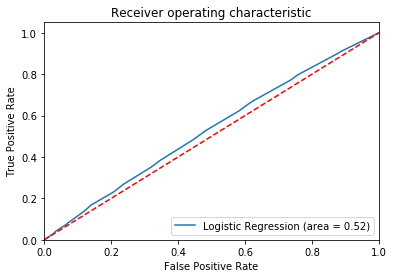

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Since the accuracy of Random Forests is lesser than Logistic Regression and so does the AUC score and curve, we are going ahead with only Logistic Regression

## Adding other two variables to our model 'u_id' and 'mgoc_id'

In [57]:
X_train_new=data_train.loc[:,['title_proximity_tfidf','description_proximity_tfidf','main_query_tfidf','query_jl_score','query_title_score','city_match','job_age_days','u_id','mgoc_id']]
Y_train_new=data_train.loc[:,['apply']]
X_test_new=data_test.loc[:,['title_proximity_tfidf','description_proximity_tfidf','main_query_tfidf','query_jl_score','query_title_score','city_match','job_age_days','u_id','mgoc_id']]
Y_test_new=data_test.loc[:,['apply']]

In [58]:
# Converting the string variable u_id into numeric else we would get an error

In [59]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(data_train['u_id'])
z = lb.fit_transform(data_test['u_id'])

In [60]:
y=pd.DataFrame(y,columns=['u_id'])
z=pd.DataFrame(z,columns=['u_id'])

In [61]:
del X_train_new['u_id']
del X_test_new['u_id']

In [62]:
#X_test_new=pd.concat([X_test_new,z], axis=1)
X_test_new=X_test_new.reset_index()
X_train_new=X_train_new.reset_index()
Y_train_new=Y_train_new.reset_index()
Y_test_new=Y_test_new.reset_index()
X_train_new=X_train_new.join(y)
X_test_new=X_test_new.join(z)

In [63]:
print(len(z))
print(len(X_test_new))
print(len(y))
print(len(X_train_new))

116526
116526
1084364
1084364


In [64]:
del X_test_new['search_date_pacific']
del X_train_new['search_date_pacific']
#X_train_new.head(1)

In [65]:
Y_train_new.head(1)
del Y_train_new['search_date_pacific']
del Y_test_new['search_date_pacific']

In [66]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train_new,X_train_new)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.305828
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  apply   No. Observations:              1084364
Model:                          Logit   Df Residuals:                  1084355
Method:                           MLE   Df Model:                            8
Date:                Mon, 26 Mar 2018   Pseudo R-squ.:                -0.01213
Time:                        23:48:00   Log-Likelihood:            -3.3163e+05
converged:                       True   LL-Null:                   -3.2765e+05
                                        LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
title_proximity_tfidf           0.0108      0.000     22.194      0.000   

In [67]:
# The coefficients of the new variables are close to 0  and almost invalid

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from regressors import stats
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train_new, Y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
y_pred_new = logreg.predict(X_test_new)
from sklearn.metrics import classification_report
print(classification_report(Y_test_new, y_pred_new))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95    105940
          1       0.09      0.00      0.00     10586

avg / total       0.83      0.91      0.87    116526



In [70]:
sm = SMOTE(random_state=12, ratio = 'minority')
x_train_res2, y_train_res2 = sm.fit_sample(X_train_new, Y_train_new)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from regressors import stats
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train_res2, y_train_res2)
y_pred_new = logreg.predict(X_test_new)
from sklearn.metrics import classification_report
print(classification_report(Y_test_new, y_pred_new))

             precision    recall  f1-score   support

          0       0.92      0.52      0.66    105940
          1       0.10      0.56      0.18     10586

avg / total       0.85      0.52      0.62    116526



In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_new,y_pred_new)
print(confusion_matrix)

[[55074 50866]
 [ 4639  5947]]


<b> The accuracy of the above model is 52.3% </b>

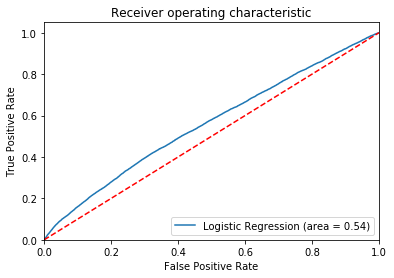

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test_new, logreg.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(Y_test_new, logreg.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### The AUC score fell by almost 4% after including this new variable

# References:

http://blog.yhat.com/posts/logistic-regression-and-python.html

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

http://scikit-learn.org/stable/modules/ensemble.html#random-forests

http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html

https://stats.stackexchange.com

https://pandas.pydata.org/

http://scikit-learn.org/stable/modules/naive_bayes.html